TODO: 

* ~~number of articles (number of ideas present)~~
* create FLN 
    - degree distribution (how connected ideas are?)
    - list of invalid first links 
    - accumulation (what's the most important idea), cycles (groups of ideas), and influence (most influential idea)
    
Mark TODO: 
1. interactive analysis/pots of number of articles
    * overlay number of words though time 
2. generate data for degree distribution

3. Check potential bug in output traversal funnels vs. visits (numbers look the same)

Fletcher TODO:
1. visits/funnels interactive and static visulatizations


    

In [39]:
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict

#change to appropriate path
results_path = "/Users/mark/Desktop/wiki_v4/"  

In [2]:
#load word with years json

with open("data/words_with_years.json") as dw:
    word_years_dict = json.load(dw)
    #default dict value of 2015
    word_years_dict = defaultdict(lambda: 2015, word_years_dict)
    

In [40]:
#load Wikipedia First Link Network 


with open(results_path + "fln.json") as f:
    fln_dict = json.load(f)
fln_df = pd.DataFrame.from_dict(fln_dict, orient='index')
fln_df.index.name = 'article'
fln_df.columns = ['first link']
fln_df = fln_df.reset_index()

In [41]:
def get_article_year(title):
    """
    returns the earliest year
    the article could have appeared
    by computing the latest first 
    appearance of the words in the title
    """
    years = []
    for word in title.split():
        years.append(word_years_dict[word.lower().strip("()")])
    years.sort()
    if years:
        return years[-1]
    else:
        return 2015

In [42]:
#apply function to dataframe (runtime ~3 min)
fln_df['year'] = fln_df['article'].apply(get_article_year)

## Number of articles 
a proxy for the evolution of the number of ideas through time

In [23]:
centuries = range(1000, 2100, 100)
number_of_articles = []

for century in centuries:
    number_of_articles.append(fln_df[fln_df['year'] < century].shape[0])
    
print(number_of_articles)

[4831, 4846, 7862, 57181, 223855, 338295, 600318, 842167, 975114, 1352947, 1561524]


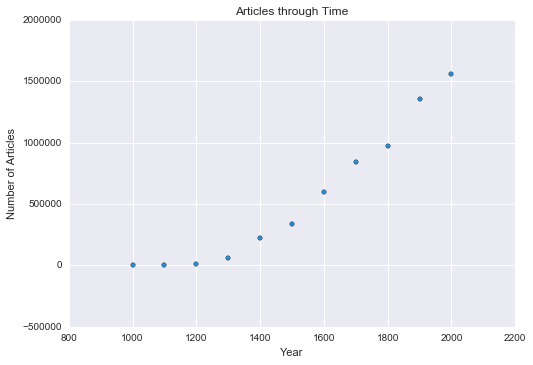

In [24]:
plt.scatter(centuries, number_of_articles, c="#268bd2")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Articles through Time")

In [38]:
print number_of_articles

[4834, 4849, 7865, 57184, 223858, 338298, 600321, 842172, 975123, 1352958, 1561537]


**By decade**

In [39]:
decades = range(1800, 2010, 10)

num_articles_by_decade = []

for decade in decades:
    num_articles_by_decade.append(fln_df[fln_df['year'] < decade].shape[0])
    

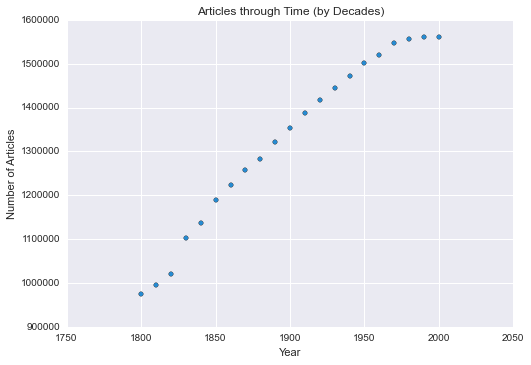

In [40]:
plt.scatter(decades, num_articles_by_decade, c="#268bd2")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Articles through Time (by Decades)")

### By year

In [6]:
#save article data by year

years = range(1500, 2010, 1)

num_articles_by_year = []

for year in years:
        num_articles_by_year.append(fln_df[fln_df['year'] < year].shape[0])
        
num_articles_by_year_dict = dict(zip(years, num_articles_by_year))

#write data to file
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "num_articles_by_year.json", "w") as f:
    json.dump(num_articles_by_year_dict, f)

## Degree Distribution and Invalid Links
how connected and disconnected are ideas?

### average degree distribution through time


In [4]:

#load ndegree data

with open(results_path + 'direct_links.json', 'r') as fp:
    direct_links = json.load(fp)



In [5]:
dldf = pd.DataFrame(direct_links.items())

In [7]:
dldf.columns = ['article', 'direct links']

#add ndegree dataframe column
l = lambda x: len(x)
dldf['indegree'] = dldf['direct links'].map(l)

dldf

,article,direct links,indegree
0,Software release life cycle#Release,"[Going gold, Gone Gold, Gold (software), Gold ...",5
1,bolt action rifle,"[Remington Model 673, Alejandro Sniper Rifle, ...",3
2,Pig (1998 film),[Nico B.],1
3,Saturn I#S-I_stage,[S-I],1
4,Anniston Museum of Natural History,[Anniston museum of natural history],1
5,Bitiče,[Bitice],1
6,AEF Monotrace,"[AEF Air Lift System Monotrace, Monotrace]",2
7,Xel-Ha Park,"[Xel Ha Park, Xel-Há Park, Xel-Há Eco Park, Xe...",8
8,Canton of Chalamont,[Canton of chalamont],1
9,Diocese of Nidaros,"[Diocese of nidaros, Bishop of Nidaros]",2


In [8]:
dldf['year'] = dldf['article'].apply(get_article_year)

In [13]:
indegrees = []
for year in range(1500, 2010, 1):
    indegrees.append(dldf[dldf['year'] < year]['indegree'].mean())

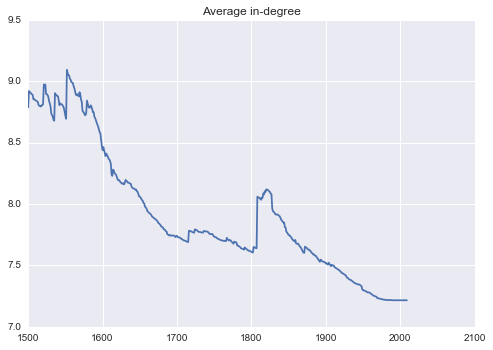

In [15]:
plt.plot(range(1500, 2010, 1), indegrees)
plt.title("Average in-degree")

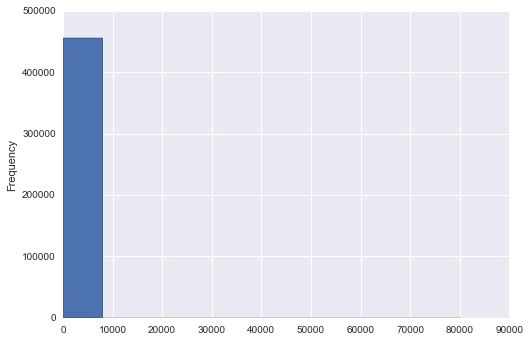

In [21]:
#test distribution plots
dldf[dldf['year'] < 1950]['indegree'].plot(kind='hist')

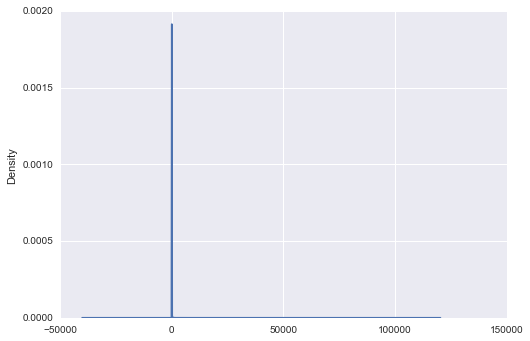

In [23]:
dldf[dldf['year'] < 1950]['indegree'].plot(kind='density')


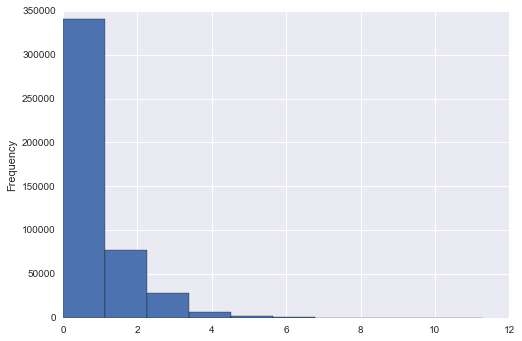

In [24]:
#look at log
np.log(dldf[dldf['year'] < 1950]['indegree']).plot(kind='hist')

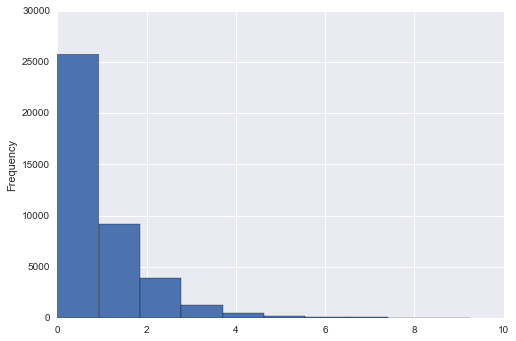

In [25]:
np.log(dldf[dldf['year'] < 1350]['indegree']).plot(kind='hist')

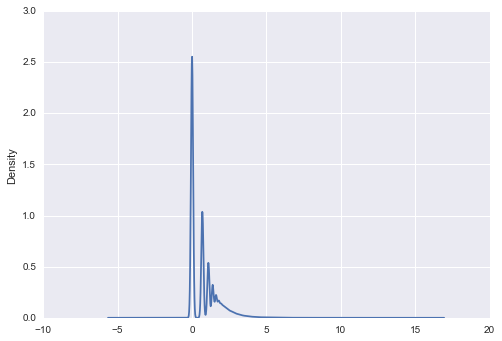

In [27]:
np.log(dldf[dldf['year'] < 1950]['indegree']).plot(kind='density')

### log(median) of octile bins 

In [35]:
#give log(median) of octile bins 
list(np.log(dldf[dldf['year'] < 1950]['indegree']).quantile(q=[0, 0.125, 2*0.125, 
                                                               3*0.125, 4*0.125, 5*0.125, 6*0.125, 7*0.125, 1]))

[0.0,
 0.0,
 0.0,
 0.0,
 0.69314718055994529,
 0.69314718055994529,
 1.3862943611198906,
 1.9459101490553132,
 11.292889579855432]

In [36]:
octiles_log_dict = {}
for year in range(1500, 2010, 1):
    octiles_log_dict[year] = list(np.log(dldf[dldf['year'] < year]['indegree']).quantile(q=[0, 0.125, 2*0.125, 
                                                               3*0.125, 4*0.125, 5*0.125, 6*0.125, 7*0.125, 1]))

In [38]:
#write octiles data
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "octiles_log.json", "w") as f:
    json.dump(octiles_log_dict, f)



## Where do references accumulate?
how does the main anchor for our ideas change through time?

In [26]:
# for viz, give fletcher dictionary (stored as json)

from net_metrics import net_metrics

In [43]:
sample_net_dict = {'A': 'B', 'B':'C', 'C':'A', 'D':'C', 'E':'C',
              'G':'E', 'F':'E'}
test_net = net_metrics.Network(sample_net_dict)
print(test_net.traversal_visits)
print(test_net.traversal_funnels)


defaultdict(<type 'int'>, {'A': 7, 'C': 7, 'B': 7, 'E': 2})
defaultdict(<type 'int'>, {'C': 4, 'E': 2})


In [44]:
#get dictionary with node --> link

def build_network(year):
    """
    returns a network object metrics as attributes
    """
    net_data = fln_df[fln_df['year'] < year]
    net_dict = net_data.set_index('article')['first link'].to_dict()
    net = net_metrics.Network(net_dict)
    return net


In [45]:
net = build_network(1800)

In [46]:
net.traversal_visits

defaultdict(int,
            {u'Flat Lake (Nova Scotia)': 1,
             u'Amber salamander': 1,
             u'Zophobas morio': 2,
             u'Amblyomma cajennense': 2,
             u'Music manuscript': 2,
             u'Walsh Island, New South Wales': 1,
             u'spiders': 3,
             u'Kido Butai': 5,
             u'Garden path sentence': 5,
             u'Daddy-Long-Legs (novel)': 4,
             u'University College South Denmark': 1,
             u'The ACE Academy': 1,
             u'Tim D. White': 2,
             u'nunnery': 1,
             u'Robert C. Brack': 1,
             u'MV Bright Field': 2,
             u'Hall Green': 4,
             u'Nick Kamen': 1,
             u'pythagorean theorem': 1,
             u'Made to Worship': 1,
             u'Lucha Libre': 5,
             u'Armoured Cavalry Branch Training School': 3,
             u'Lockheed Propulsion Company': 1,
             u'Secularism': 5,
             u'Transformation (function)': 5,
             u'A D

In [47]:
net.traversal_funnels

defaultdict(int,
            {u'Flat Lake (Nova Scotia)': 1,
             u'Amber salamander': 1,
             u'Zophobas morio': 2,
             u'Amblyomma cajennense': 2,
             u'Music manuscript': 2,
             u'Walsh Island, New South Wales': 1,
             u'spiders': 3,
             u'Kido Butai': 5,
             u'Garden path sentence': 5,
             u'Daddy-Long-Legs (novel)': 4,
             u'University College South Denmark': 1,
             u'The ACE Academy': 1,
             u'Tim D. White': 2,
             u'nunnery': 1,
             u'Robert C. Brack': 1,
             u'MV Bright Field': 2,
             u'Hall Green': 4,
             u'Nick Kamen': 1,
             u'pythagorean theorem': 1,
             u'Made to Worship': 1,
             u'Lucha Libre': 5,
             u'Armoured Cavalry Branch Training School': 3,
             u'Lockheed Propulsion Company': 1,
             u'Secularism': 5,
             u'Transformation (function)': 5,
             u'A D

In [48]:
net.traversal_funnels == net.traversal_visits

False

In [54]:
net.traversal_funnels['Little Haiti']

2

In [55]:
net.traversal_visits['Little Haiti']

2

In [19]:
#again by decades (runtime ~4min)
decades = range(1000, 2020, 10)

net_metrics_dict_decade = {}

for decade in decades:
    net = build_network(decade)
    net_metrics_dict_decade[decade] = {'visits': net.traversal_visits, 'funnels': net.traversal_funnels}

#write data
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "net_metrics_decade.json", "w") as f:
    json.dump(net_metrics_dict_decade, f)


In [29]:
for t in sorted(net.traversal_visits.items(), key=lambda x:x[1])[-10:]:
    print({"name":t[0], "value": t[1]})



{'value': 1434, 'name': 'England'}
{'value': 1529, 'name': 'American football'}
{'value': 1581, 'name': 'Christianity'}
{'value': 1598, 'name': 'Canada'}
{'value': 1606, 'name': 'Abrahamic religions'}
{'value': 1785, 'name': 'mathematics'}
{'value': 1857, 'name': 'team sport'}
{'value': 1982, 'name': 'studio album'}
{'value': 2682, 'name': 'United Kingdom'}
{'value': 6968, 'name': 'United States'}


In [ ]:
#top 10 for fletcher (~runtime >20min)
decades = range(1000, 2020, 10)
net_metrics_dict_decade_top_10 = {}

for decade in decades:
    net = build_network(decade)
    net_metrics_dict_decade_top_10[decade] = {'visits': 
                                               [{'name': t[0], 'value': t[1]} for t in sorted(net.traversal_visits.items(), key=lambda x:x[1])[-10:]],
                                               'funnels': 
                                               [{'name': f[0], 'value': f[1]} for f in sorted(net.traversal_funnels.items(), key=lambda x:x[1])[-10:]]}

#write data
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "net_metrics_decade_top_10.json", "w") as f:
    json.dump(net_metrics_dict_decade_top_10, f)